In [64]:
import networkx as nx
import matplotlib as plt
%matplotlib notebook

# Clustering Coefficient

Triadic closure: the tendency for people who share connections in a social network to become connected. AKA Clustering
What edges are likely to come to the network next? -->Those edges that close triangles are good candidated for edges that may show up next

How can we measure the prevalence of Triadic closure in a network?

## local Clustering Coeff

fraction of pairs of the nodes's friends that are friend with each other.

ex: Node C= ( # of pairs of C's freinds who are freinds)/ # of pairs of C's freinds

num # of pairs of C's freinds who are freinds:

num of pairs of C's freinds: [dc 'the degree of C', how many single edges it has ] dc(dc-1)/2

assume: Node that has a degree<2 coefficient will be set to 0

In [97]:
G = nx.Graph()
G.add_edges_from([("A","K"),("A","B"),("A","C"),("B","C"),("B","K"),("C","E"),("C","F"),("D","E"),("E","F"),("E","H"),("F","G"),("I","J"),("I","E")])
nx.clustering(G,"F"), nx.clustering(G,'A')

(0.3333333333333333, 0.6666666666666666)

<IPython.core.display.Javascript object>


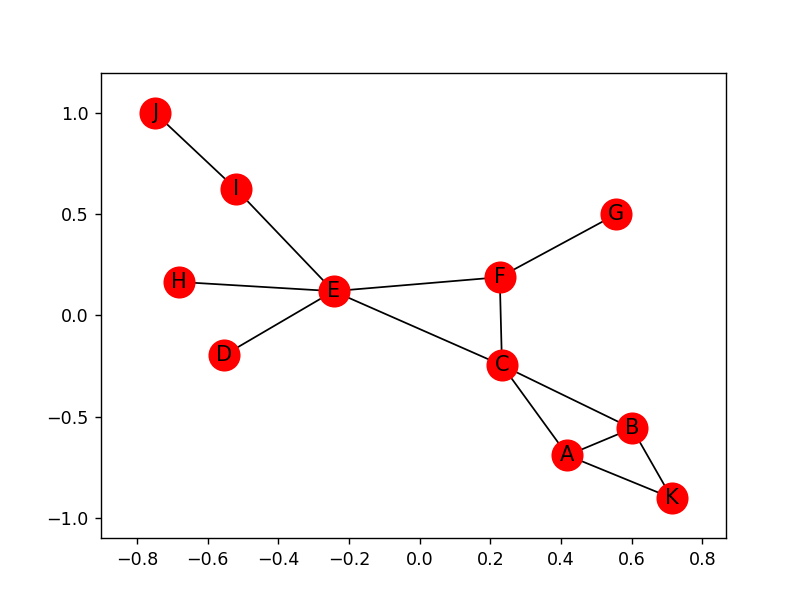

In [66]:
nx.draw_networkx(G)

## Global Clustering Coeff

In [67]:
# approach 1: avg local clustering coef over all nodes

nx.average_clustering(G)

0.2818181818181818

approach 2:% of open triads that are trinagles in a network

( 3 nodes connected by only 2 edges, instead of 3 for a triangle)

therell be always 3 open triads for each open triangle 

Transitivity = 3* # closed triads/ # open triads

Trans weights nodes with large degree higher

In [68]:
nx.transitivity(G)

0.3333333333333333

# Distance Measures

- Path: A sequence of nodes connected by an edge
- distance: length of shortest path between them

In [69]:
nx.shortest_path(G,"A","H")

['A', 'C', 'E', 'H']

In [70]:
nx.shortest_path_length(G,"A","H")

3

- Find distance from node A to every other node:
- Breadth-first-search: dist from a node to all nodes by discoevering nodes in layers

In [71]:
T = nx.bfs_tree(G,"A")
T.edges()

OutEdgeView([('A', 'K'), ('A', 'B'), ('A', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('F', 'G'), ('I', 'J')])

In [72]:
nx.shortest_path_length(G,"A")

{'A': 0,
 'B': 1,
 'C': 1,
 'D': 3,
 'E': 2,
 'F': 2,
 'G': 3,
 'H': 3,
 'I': 3,
 'J': 4,
 'K': 1}

## average dist 

In [73]:
nx.average_shortest_path_length(G)

2.381818181818182

## Max distance

In [74]:
# called diameter...
nx.diameter(G)

5

## Eccentricity
of node n is the largest distance betwwen n and all other nodes

In [75]:
nx.eccentricity(G)
# take node E, no node in this graph is at distance larger than three from node E

{'A': 4,
 'B': 4,
 'C': 3,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 5}

In [76]:
# radius is the minimum eccentricity
nx.radius(G)

3

## Periphery

set of nodes in G that have an eccentricity equal to the diameter --> nodes that are furthest away

In [77]:
nx.periphery(G)

['K', 'J']

## Center
set of nodes that have eccentricity equal to the radius --> nodes closest to the center

In [78]:
nx.center(G)

['C', 'E', 'F']

<IPython.core.display.Javascript object>


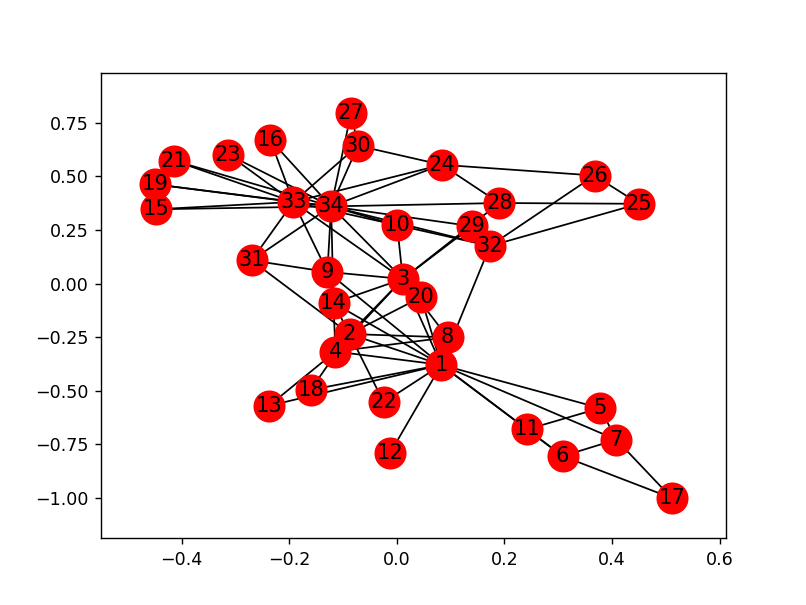

In [93]:
# example
G = nx.karate_club_graph()
G=nx.convert_node_labels_to_integers(G, first_label=1)


nx.draw_networkx(G)

In [81]:
nx.radius(G)

3

In [82]:
nx.average_shortest_path_length(G)

2.408199643493761

In [83]:
nx.diameter(G)

5

In [84]:
nx.center(G)

[1, 2, 3, 4, 9, 14, 20, 32]

In [85]:
nx.periphery(G)

[15, 16, 17, 19, 21, 23, 24, 27, 30]

# Connected components

an undirected graph is connected if, for every pair nodes there is a path between them

conditions:
- every node in the subset has a path to every other node
- no other nodes has a path to and from every node in the subset

In [98]:
nx.is_connected(G)

True

In [99]:
nx.number_connected_components(G)

1

In [100]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'}]

In [103]:
nx.node_connected_component(G,"J")

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'}

## Directed graphs

a directed graph is **strongly** connected if for every pair of nodes u and v there is a directed path from u to v and a directed path from v to u

a directed graph is **weakly** connected if replacing all directed edges with undirected edges produces a connected unidrected graph

Strongly connected component:

A subset of nodes such as:

conditions:
- every node in the subset has a **directed** path to every other node
- no other nodes has a **directed** path to and frome every node in the subset

# Network Robustness

the ability of a network to maintain its general structural properties when it faces failures or attacks

or 

ability to maintain its connectivity even after 'attacks' (like removal of node)

- Robust networks have large minimum node and edge cuts

## Disconnecting a graph

?# of nodes that can be removed from G in order to discconnec it?

? smallest # of edges that can be removed from this graph in order to disconnect it?

## Simple Paths

Immage node G wants to send a message to node H by passing it along to other odes in this nx, what are the options?

In [110]:
sorted(nx.all_simple_paths(G,"G","H"))

[['G', 'F', 'C', 'E', 'H'], ['G', 'F', 'E', 'H']]

If we wanted to block the message from G to H by removing **nodes** from nx how many nodes would we need to remove?

In [111]:
nx.node_connectivity(G,"G","H")

1

In [112]:
nx.minimum_node_cut(G,"G","H")

{'E'}

If we wanted to block the message from G to H by removing **edges** from nx how many nodes would we need to remove?

In [113]:
nx.edge_connectivity(G,"G","H")

1

In [114]:
nx.minimum_edge_cut(G,"G","H")

{('E', 'H')}

# Visualizing Networks

In [1]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

In [2]:
nx.__version__

'1.11'

<IPython.core.display.Javascript object>


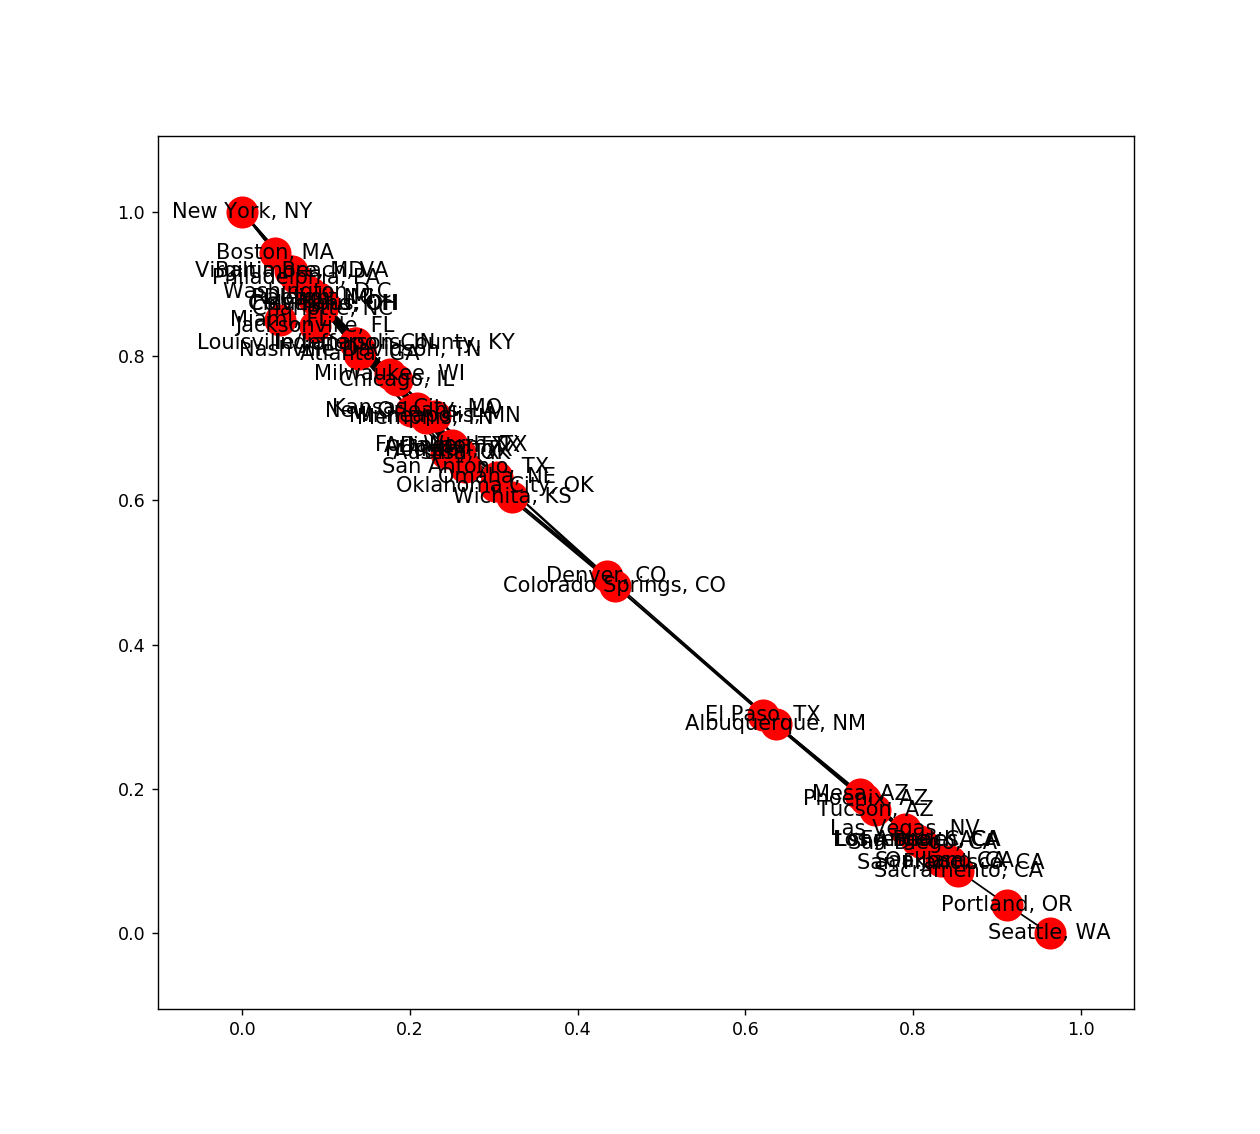

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [3]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [4]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<IPython.core.display.Javascript object>


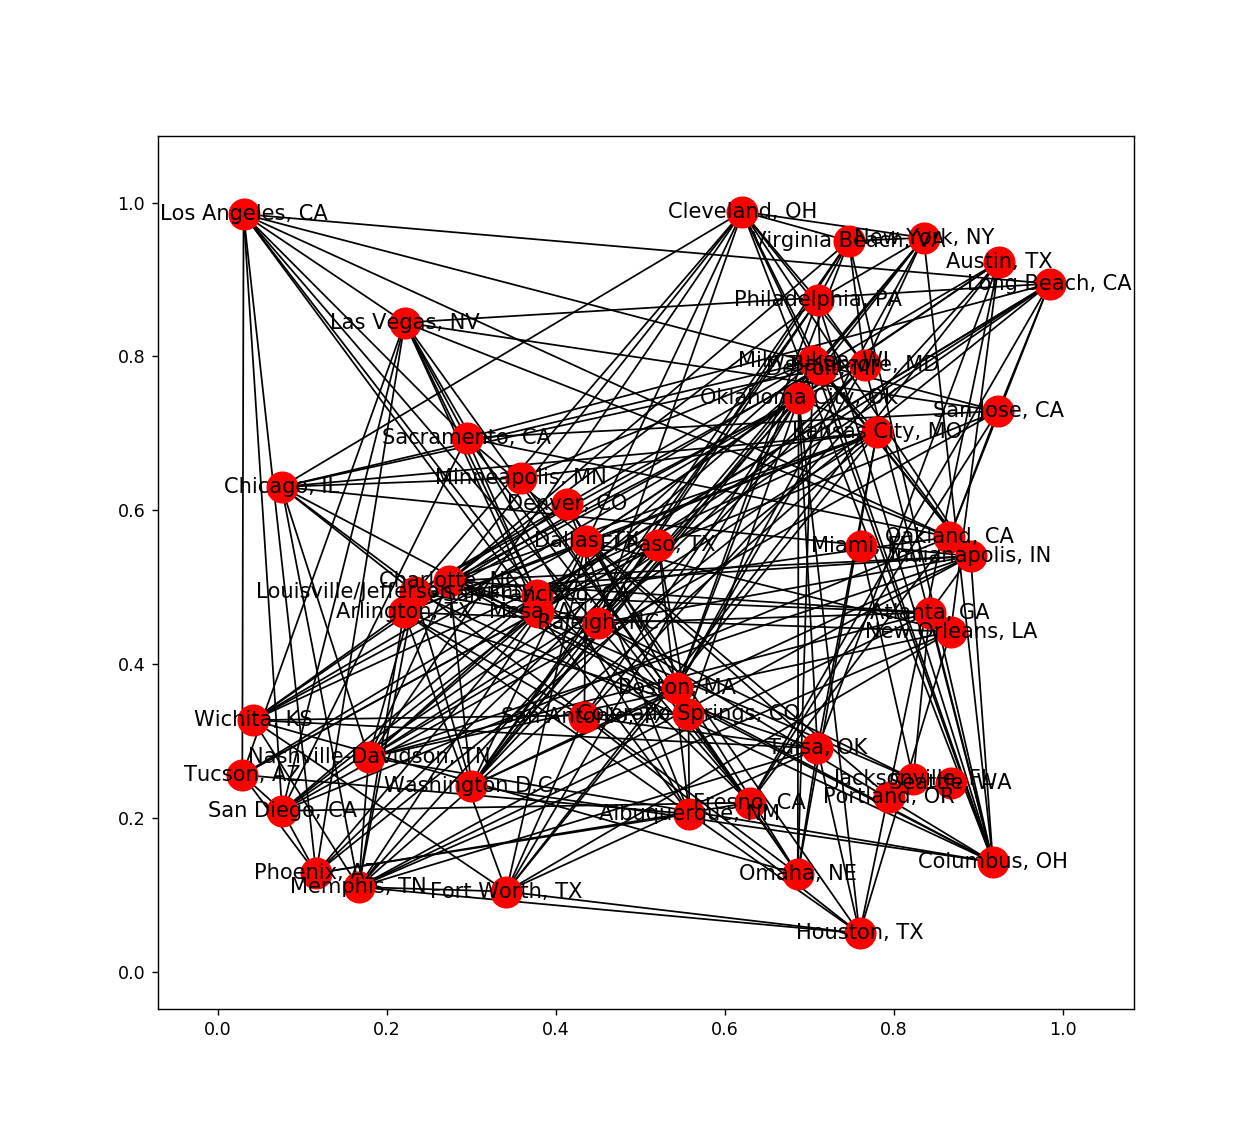

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [5]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


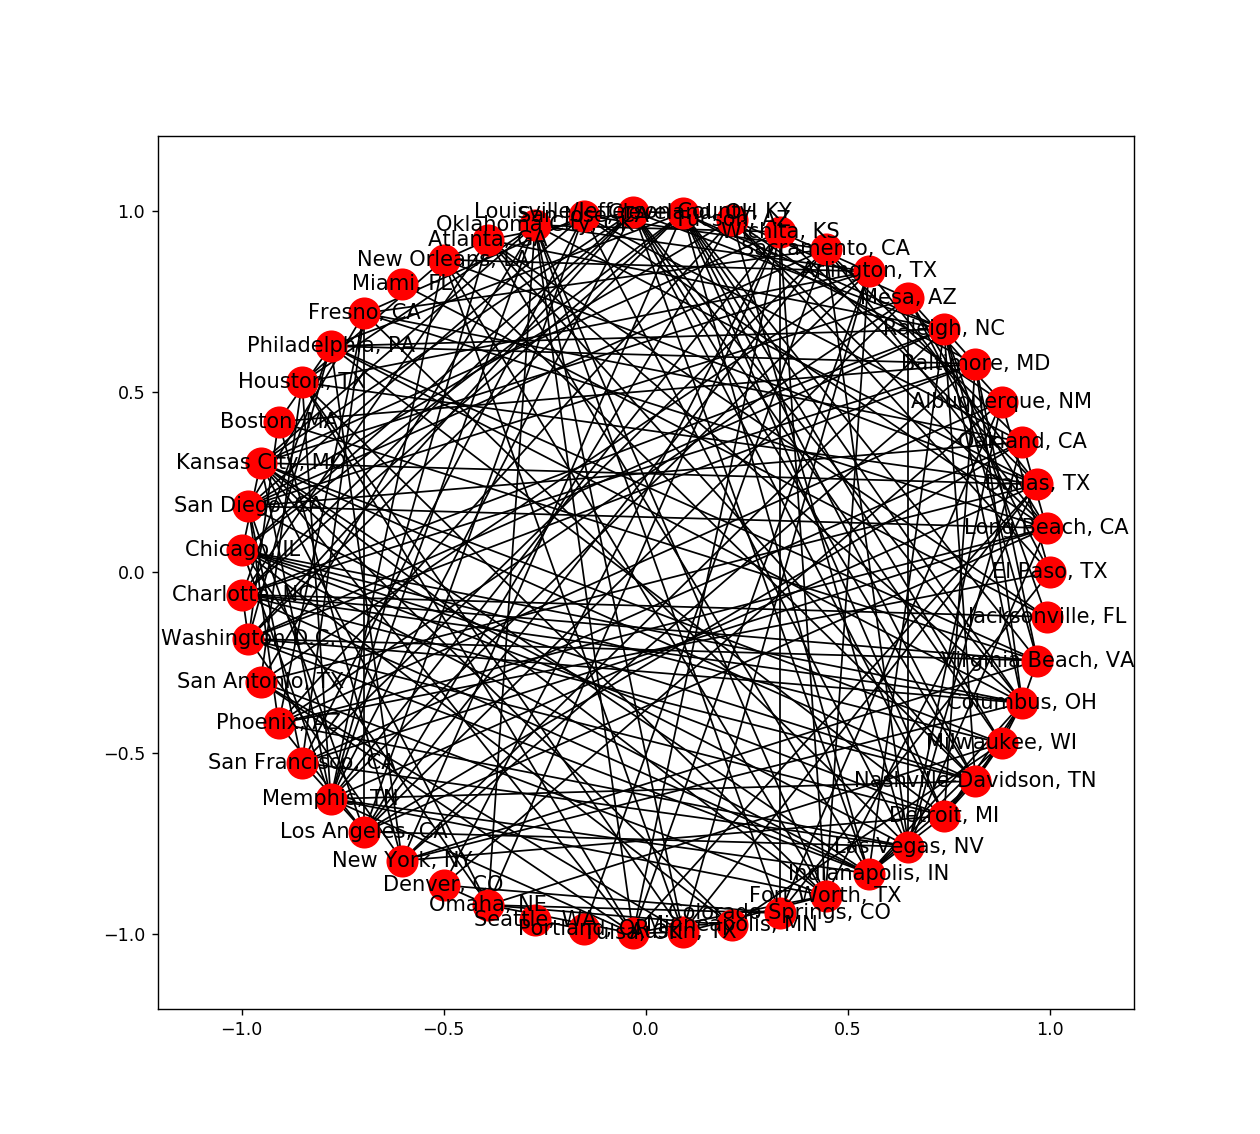

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [6]:
# circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


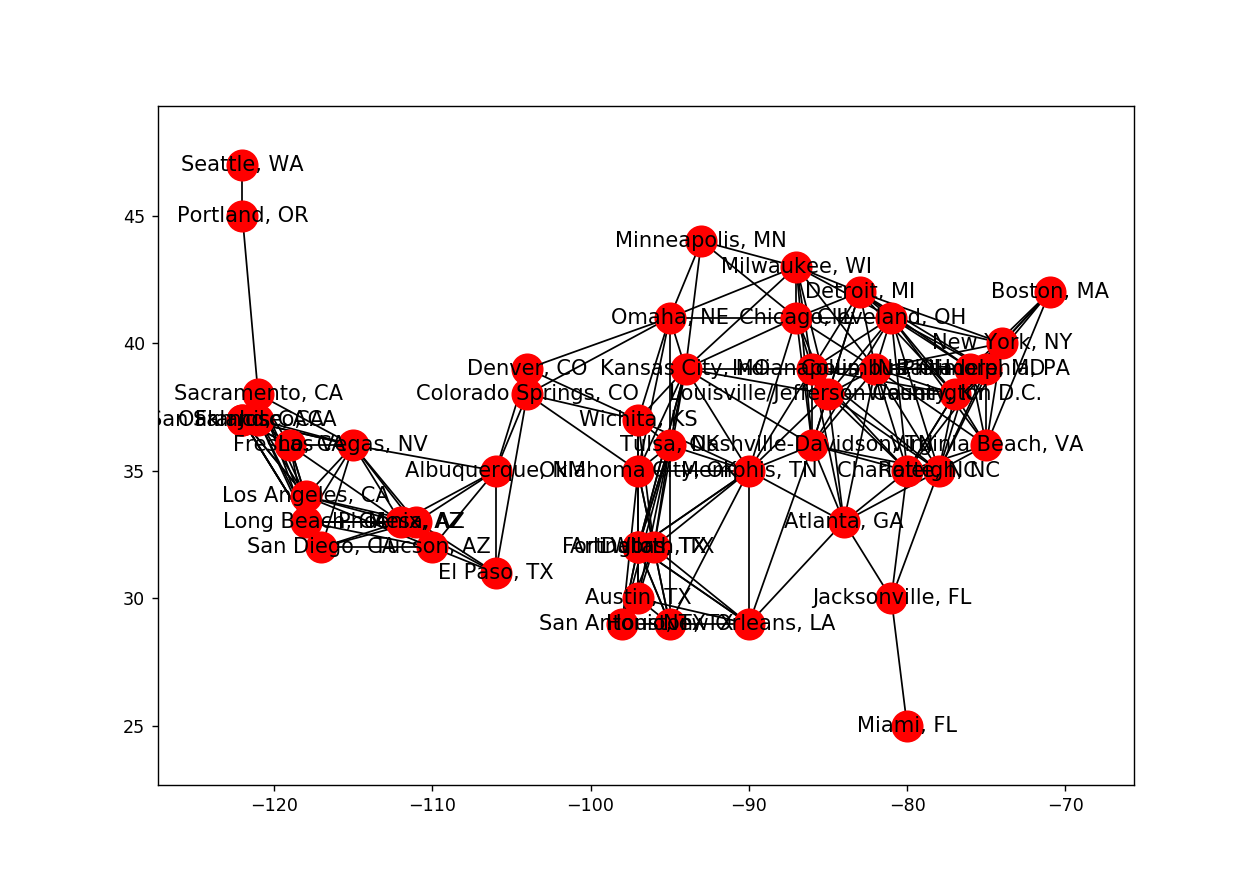

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [7]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


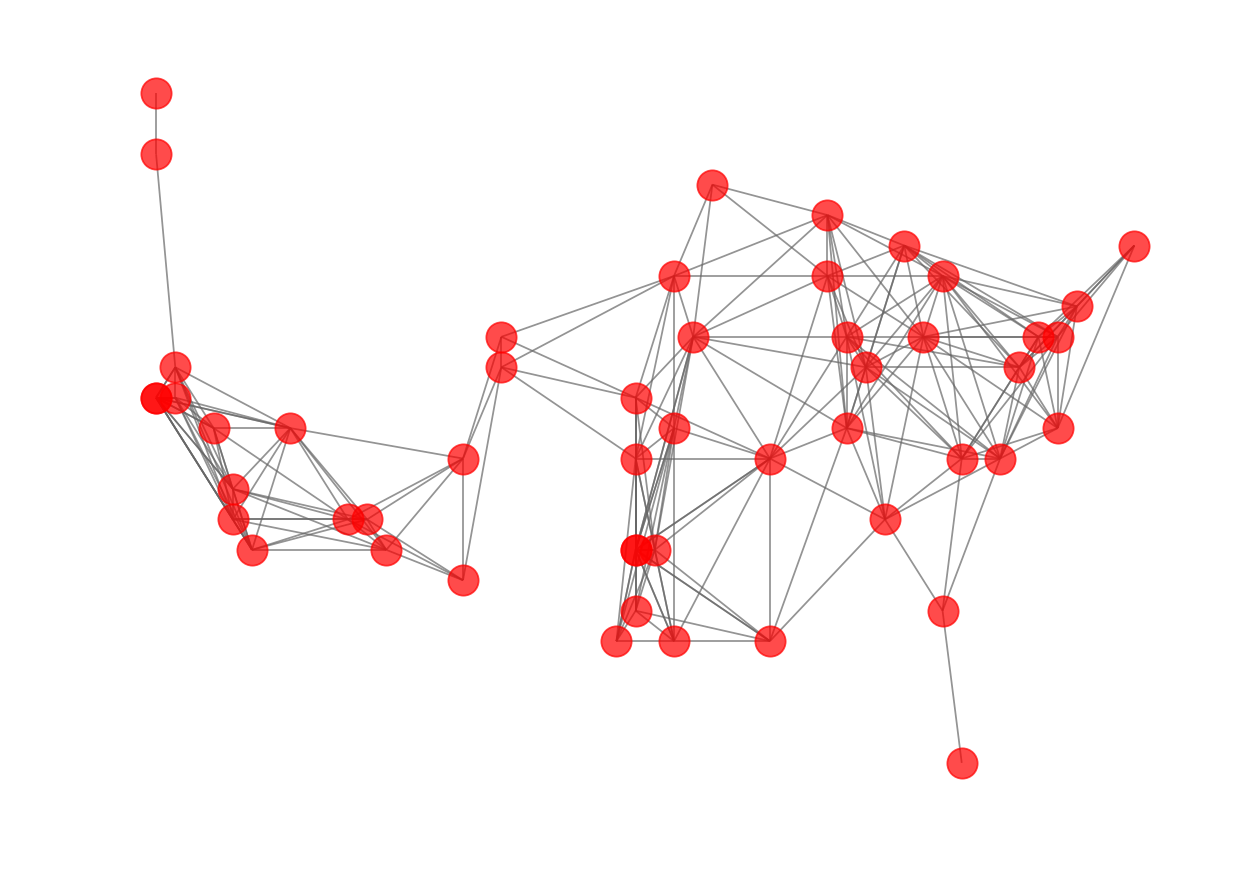

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


In [8]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


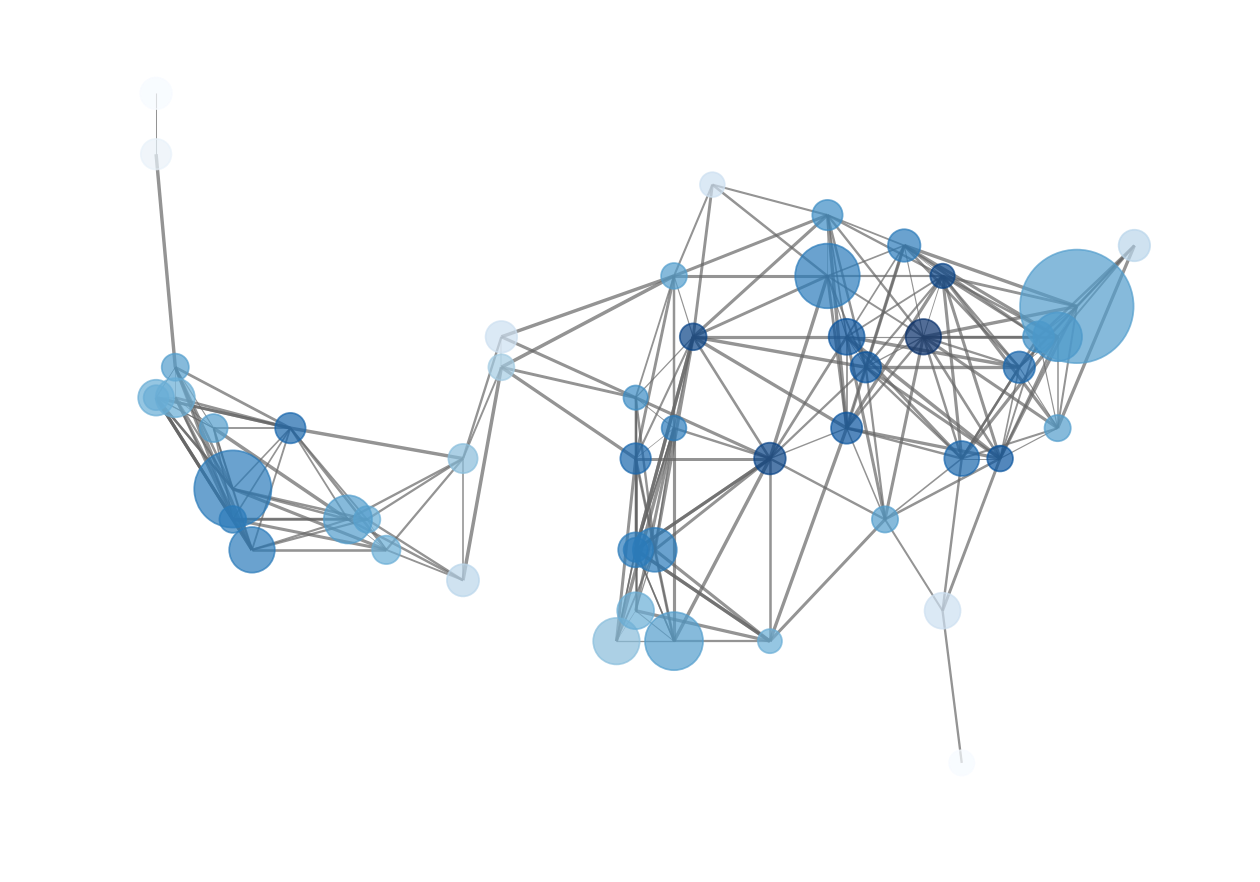

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


In [12]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0025*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


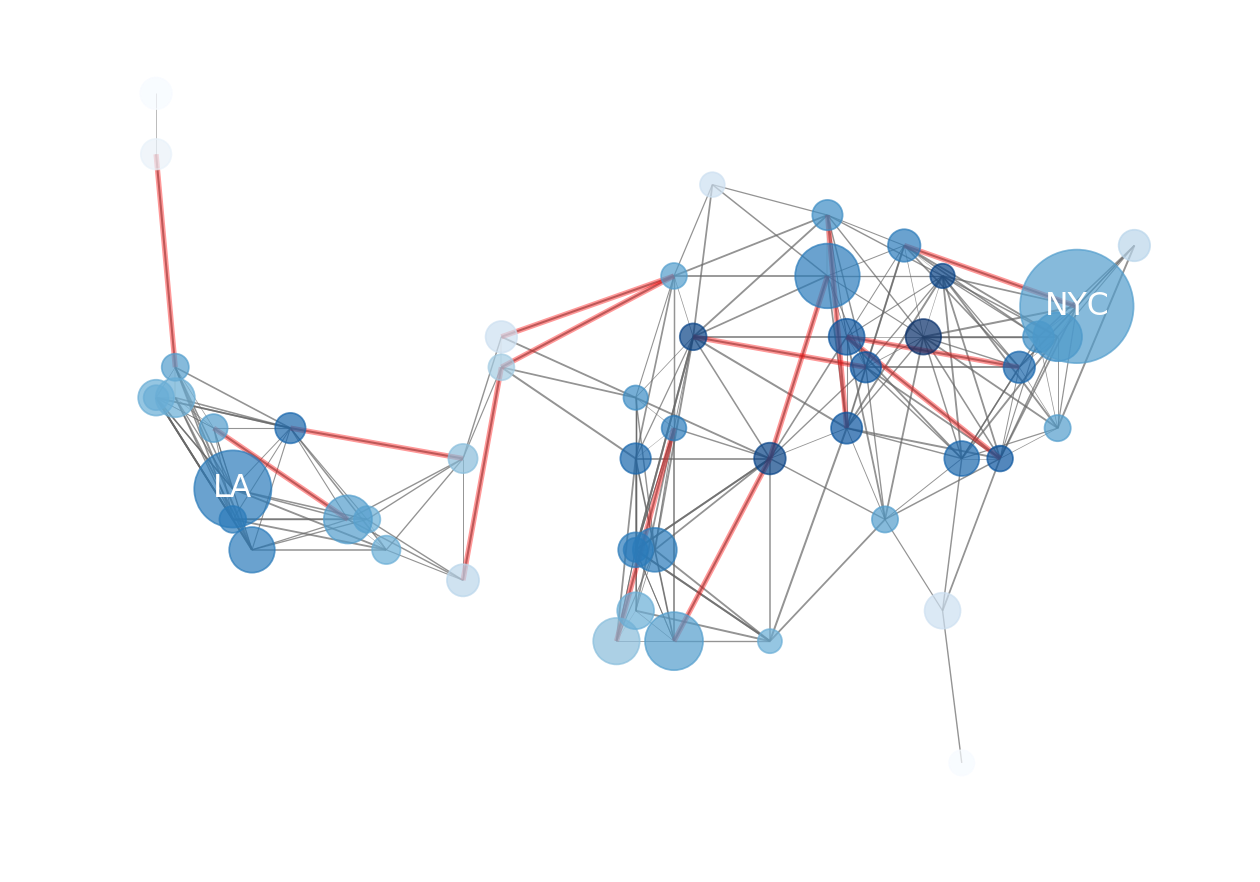

C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Keulando\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [14]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=3)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

In [1]:
def answer_one():
    
    G = nx.read_edgelist('email_network.txt', delimiter='\t', 
                             create_using=nx.MultiDiGraph(),
                            data=[('time',int)], nodetype=str)
    return G

In [2]:
def answer_two():
        
    G = answer_one()
    employees = len(G.nodes())
    emails = len(G.edges())
    return employees, emails

In [3]:
def answer_three():
        
     #is it possible for information to go from every employee to every 
     #other employee?
    # its asking if G is strongly connected or not
    # for part2 since its a directed we gotta transform it to unD
    G_unD=G.to_undirected()
    return nx.is_strongly_connected(G),nx.is_connected(G_unD)